In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
idx = 220

data_path = Path('/mnt/f/isee_dataset/12673/input/').glob('*.npz')
data_path = sorted(data_path)

label_path = Path('/mnt/f/isee_dataset/12673/label/').glob('*.npz')
label_path = sorted(label_path)

print(data_path[idx].name)
print(label_path[idx].name)

input_12673_20170906_021200.npz
label_12673_20170906_021200.npz


In [3]:
labels = np.load(label_path[idx])

In [4]:
labels.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fd9b79e6a00>)

In [71]:
b = labels['label']
b = b[:, :-1, :-1, :-1]
b = np.clip(b, -6000, 6000)
b.shape

(3, 512, 256, 256)

In [72]:
inputs = b[:, :, :, 0]
inputs.shape

(3, 512, 256)

In [73]:
print(inputs[0].max(), inputs[0].min())
print(inputs[1].max(), inputs[1].min())
print(inputs[2].max(), inputs[2].min())

1789.83 -3633.51
4016.59 -2427.55
3173.71 -3423.47


In [74]:
bx_norm = np.max(np.abs(inputs[0]))
by_norm = np.max(np.abs(inputs[1]))
bz_norm = np.max(np.abs(inputs[2]))

print(bx_norm, by_norm, bz_norm)

bx_norm = 3000
by_norm = 3000
bz_norm = 3000

3633.51 4016.59 3423.47


In [75]:
np.arange(1, 4*(b.shape[-1]), 4)

array([   1,    5,    9,   13,   17,   21,   25,   29,   33,   37,   41,
         45,   49,   53,   57,   61,   65,   69,   73,   77,   81,   85,
         89,   93,   97,  101,  105,  109,  113,  117,  121,  125,  129,
        133,  137,  141,  145,  149,  153,  157,  161,  165,  169,  173,
        177,  181,  185,  189,  193,  197,  201,  205,  209,  213,  217,
        221,  225,  229,  233,  237,  241,  245,  249,  253,  257,  261,
        265,  269,  273,  277,  281,  285,  289,  293,  297,  301,  305,
        309,  313,  317,  321,  325,  329,  333,  337,  341,  345,  349,
        353,  357,  361,  365,  369,  373,  377,  381,  385,  389,  393,
        397,  401,  405,  409,  413,  417,  421,  425,  429,  433,  437,
        441,  445,  449,  453,  457,  461,  465,  469,  473,  477,  481,
        485,  489,  493,  497,  501,  505,  509,  513,  517,  521,  525,
        529,  533,  537,  541,  545,  549,  553,  557,  561,  565,  569,
        573,  577,  581,  585,  589,  593,  597,  6

In [76]:
aa = np.arange(1, b.shape[-1]//4 + 1)
bb = 2*(np.arange(1, b.shape[-1] + 1)[b.shape[-1]//4:])
divi = np.concatenate([aa, bb])
divi

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208,
       210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234,
       236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260,
       262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286,
       288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312,
       314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338,
       340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 36

In [77]:
divi = np.arange(1, 2*(b.shape[-1]), 2)

In [78]:
bx_divisor = (bx_norm / divi).reshape(1, 1, -1).astype(np.float32)
by_divisor = (by_norm / divi).reshape(1, 1, -1).astype(np.float32)
bz_divisor = (bz_norm / divi).reshape(1, 1, -1).astype(np.float32)

In [79]:
bx = b[0]
by = b[1]
bz = b[2]

In [80]:
bx /= bx_divisor
by /= by_divisor
bz /= bz_divisor

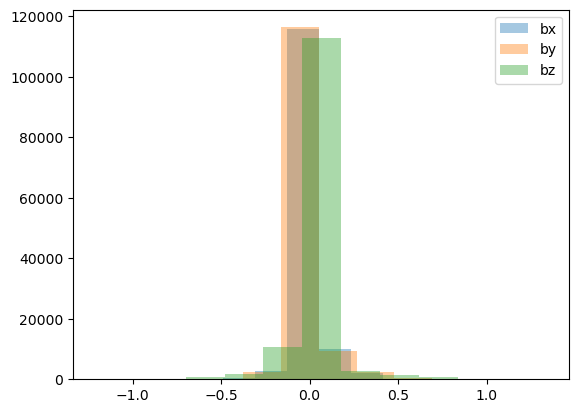

In [81]:
plt.hist(bx[:, :, 0].flatten(), alpha=0.4, label='bx')
plt.hist(by[:, :, 0].flatten(), alpha=0.4, label='by')
plt.hist(bz[:, :, 0].flatten(), alpha=0.4, label='bz')
plt.legend()
plt.show()

In [82]:
bx_min = np.min(bx, axis=(0, 1))
bx_max = np.max(bx, axis=(0, 1))

by_min = np.min(by, axis=(0, 1))
by_max = np.max(by, axis=(0, 1))

bz_min = np.min(bz, axis=(0, 1))
bz_max = np.max(bz, axis=(0, 1))

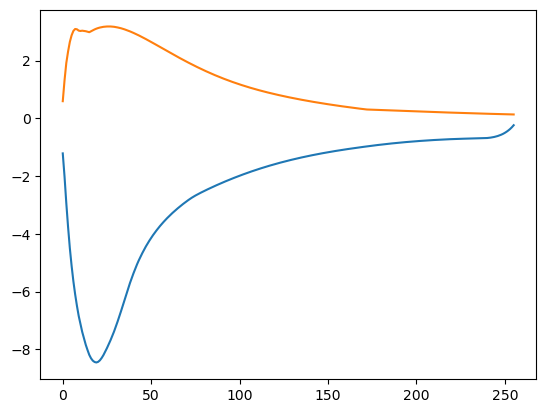

In [83]:
plt.plot(bx_min, label='bx_min')
plt.plot(bx_max, label='bx_max')
plt.show()

[]

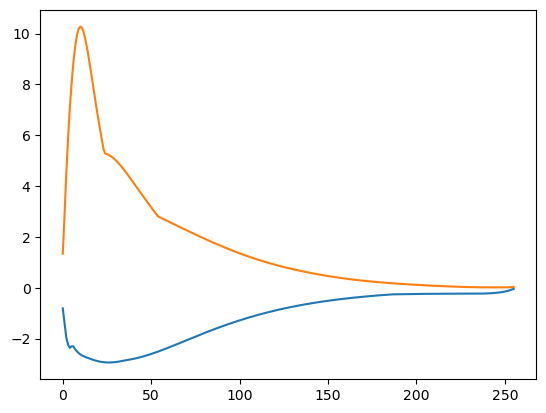

In [84]:
plt.plot(by_min, label='by_min')
plt.plot(by_max, label='by_max')
plt.plot()

[]

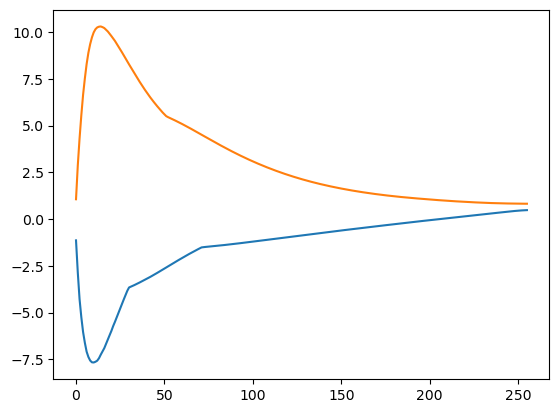

In [85]:
plt.plot(bz_min, label='bz_min')
plt.plot(bz_max, label='bz_max')
plt.plot()

In [18]:
bx_mm =(bx - bx.min()) / (bx.max() - bx.min())
by_mm =(by - by.min()) / (by.max() - by.min())
bz_mm =(bz - bz.min()) / (bz.max() - bz.min())